In [1]:
import modules.helper_func_class as misc
import modules.plot_func as pltt
import matplotlib.pyplot as plt
import numpy as np
import networkx
import random


# gerando posicioes aleatorias
#r = 2*np.random.random((1000,2))-1
#r[:,0] = r[:,0]*1
#r[:,1] = r[:,1]*5
#print(r)

In [49]:
def Tamanho_da_Caminhada(L):
    """
    cria lista de vizinhos e probabilidade de dar um passo pra cada vizinho
    """
    pstep = 0.25

    G = networkx.grid_graph((L,L),periodic=False)

    A = networkx.adjacency_matrix(G)

    vizinhos = []
    stepprob = []
    for k in range(L*L):
        vizinhos.append(np.nonzero(np.asarray(A[:,k].todense()).flatten())[0])
        pstep_vizinhos = pstep * np.ones(vizinhos[-1].size)
        stepprob.append(pstep_vizinhos/np.sum(pstep_vizinhos))

    return vizinhos,stepprob

def start_point(L):
    if (L%2==0):
        start_position = (L*(L-1)/2)-1 #define o ponto inicial no quadrado superior do centro do lattice
        return int(start_position)
    else:
        start_position = (L*L-1)/2 #define o ponto inicial no quadrado central
    return int(start_position)

def passo_na_caminhada(vizinhos,stepprob):
    """
    decide o sitio vizinho pra dar um passo
    """
    s_p  = stepprob
    k    = 0
    r    = random.random()
    p0   = 0.0
    p1   = s_p[0]
    for k in range(len(s_p)):
        p1 = p0 + s_p[k]
        if (r >= p0) and (r < p1):
            return vizinhos[k]
        p0 = p1
    return vizinhos[k]

def Caminhada_Aleatoria_2D(L, T):
    """
    realiza uma caminhada aleatoria em um lattice 2D quadrado
    L -> tamanho lateral do lattice
    T -> tempo total (nro de passos de tempo) para caminhar

    returns
        pos_list -> lista de posicoes (indice linear)
    """
    vizinhos , stepprob = Tamanho_da_Caminhada(L)

    current_position = start_point(L)
    pos_list         = [start_point(L)]

    for _ in range(T):
        current_position = passo_na_caminhada(vizinhos[current_position],stepprob[current_position])
        pos_list.append(current_position)

    return pos_list

In [50]:
vizinhos,stepprob = Tamanho_da_Caminhada(4)

vizinhos

<ipython-input-49-ffe6dbb220e4>:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = networkx.adjacency_matrix(G)


[array([1, 4], dtype=int64),
 array([0, 2, 5], dtype=int64),
 array([1, 3, 6], dtype=int64),
 array([2, 7], dtype=int64),
 array([0, 5, 8], dtype=int64),
 array([1, 4, 6, 9], dtype=int64),
 array([ 2,  5,  7, 10], dtype=int64),
 array([ 3,  6, 11], dtype=int64),
 array([ 4,  9, 12], dtype=int64),
 array([ 5,  8, 10, 13], dtype=int64),
 array([ 6,  9, 11, 14], dtype=int64),
 array([ 7, 10, 15], dtype=int64),
 array([ 8, 13], dtype=int64),
 array([ 9, 12, 14], dtype=int64),
 array([10, 13, 15], dtype=int64),
 array([11, 14], dtype=int64)]

In [53]:
L = 21
pos_list = Caminhada_Aleatoria_2D(L, 10000)

pos_list = np.array(pos_list)

y,x = np.unravel_index(pos_list,(L,L))

<ipython-input-49-ffe6dbb220e4>:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = networkx.adjacency_matrix(G)


array([10,  9, 10, ..., 18, 17, 16], dtype=int64)

In [73]:
def Caminhada_Aleatoria_2D_de_max_T(L,N,T_values):
    T_max    = np.max(T_values)
    T_values = np.array(T_values).flatten()

    p_all  = [None for _ in range(N)]
    x_list = [None for _ in range(N)]
    y_list = [None for _ in range(N)]
    for k in range(N):
        position_list = Caminhada_Aleatoria_2D(L,T_max)
        y,x           = np.unravel_index(position_list,(L,L))
        p_all[k]  = np.array(position_list).flatten()
        x_list[k] = x[T_values]
        y_list[k] = y[T_values]

    return np.array(x_list),np.array(y_list),p_all



In [75]:
T_values = [5,10,500,1000] # lista organizada e em ordem crescente
N        = 1 # Número de passos em cada caminhada
L        = 11 # Dimenções de Lattice
lista_x,lista_y,p_all = Caminhada_Aleatoria_2D_de_max_T(L,N,T_values)


<ipython-input-49-ffe6dbb220e4>:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = networkx.adjacency_matrix(G)


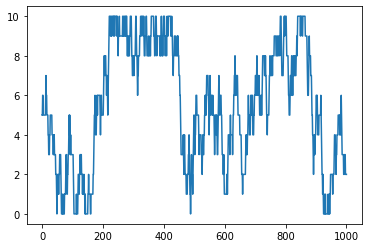

In [95]:
plt.figure()
plt.plot(np.arange(x.size),x)
plt.show()

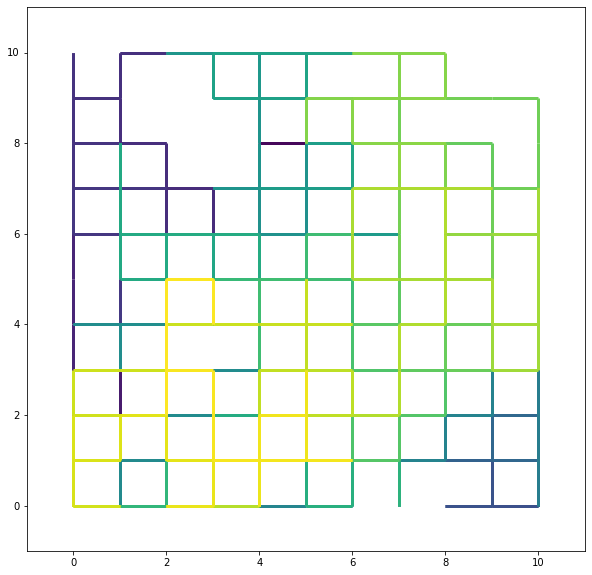

In [94]:
y,x=np.unravel_index(p_all[0],(11,11))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_gradient_line(np.array((x,y)).T,ax=ax,cmap=plt.get_cmap('viridis'))
ax.set_xlim((-1,11))
ax.set_ylim((-1,11))
plt.show()

In [70]:
r_T_5    = np.column_stack((lista_x[:,0],lista_y[:,0]))
r_T_10   = np.column_stack((lista_x[:,1],lista_y[:,1]))
r_T_500  = np.column_stack((lista_x[:,2],lista_y[:,2]))
r_T_1000 = np.column_stack((lista_x[:,3],lista_y[:,3]))


In [72]:
r_T_5

array([[4, 5]], dtype=int64)

In [18]:
#r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r) #exemple
#
#fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
#
#pltt.plot_trajectory_points(r,ax=ax,use_scatter=False,linestyle='none',marker='.')
#pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
#plt.axis('square')
#plt.show()

In [67]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

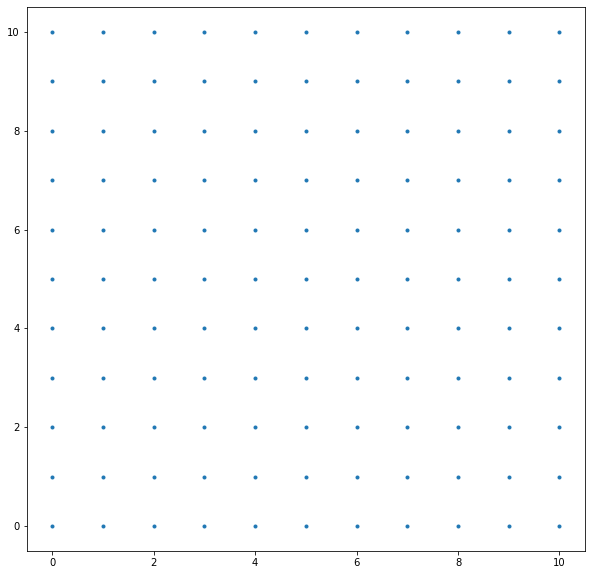

In [68]:
x,y = np.meshgrid(np.arange(11),np.arange(11))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
pltt.plot_trajectory_points(np.array((x.flatten(),y.flatten())).T,ax=ax,use_scatter=False,linestyle='none',marker='.')
plt.show()

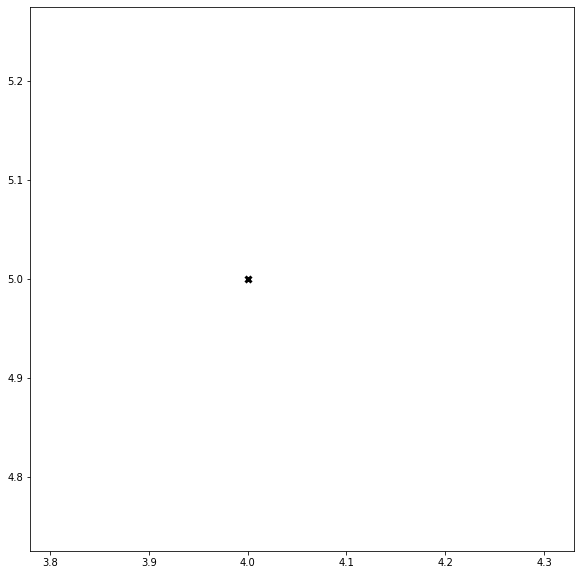

In [71]:
r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r_T_5)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_trajectory_points(r_T_5,ax=ax,use_scatter=False,linestyle='none',marker='.')
pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
plt.axis('square')
plt.show()

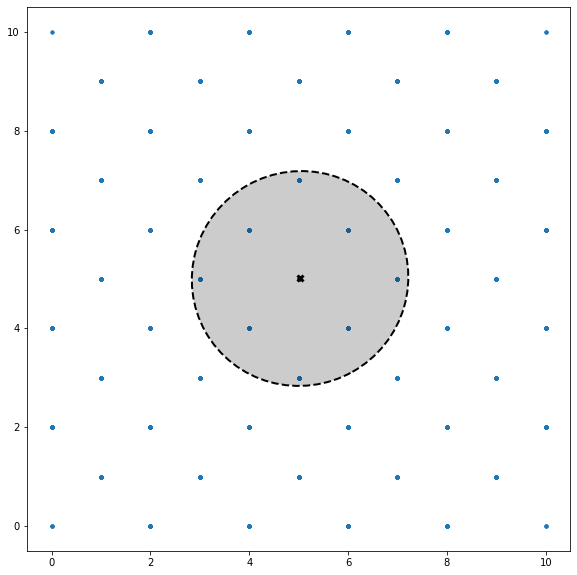

In [59]:
r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r_T_10)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_trajectory_points(r_T_10,ax=ax,use_scatter=False,linestyle='none',marker='.')
pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
plt.axis('square')
plt.show()

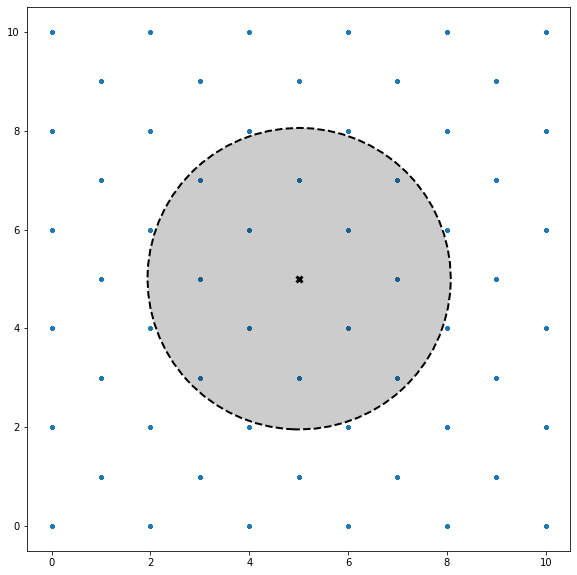

In [60]:
r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r_T_500)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_trajectory_points(r_T_500,ax=ax,use_scatter=False,linestyle='none',marker='.')
pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
plt.axis('square')
plt.show()

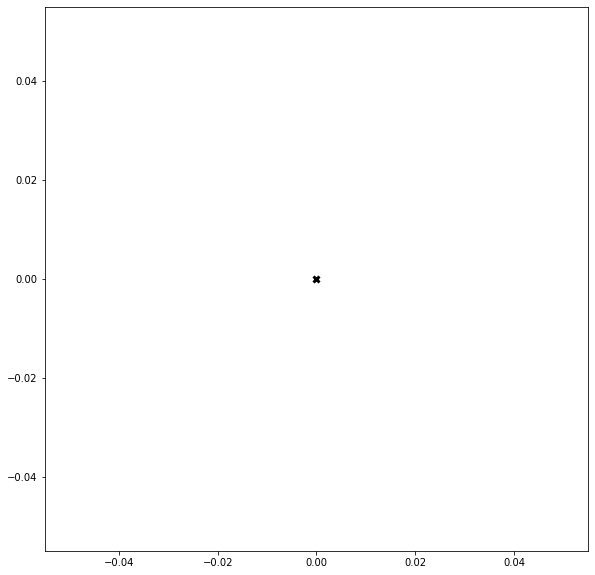

In [15]:
r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r_T_1000)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_trajectory_points(r_T_1000,ax=ax,use_scatter=False,linestyle='none',marker='.')
pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
plt.axis('square')
plt.show()

In [3]:
import modules.plot_func as pltt
import modules.traj_analysis as tran

tran.calc_number_of_checkings_per_hole
pltt._plot_hole_check_spatial_distribution